In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

2023-08-09 22:27:12.269713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pwd

'/Users/surajpawar/Desktop/Machine Learning_Keras_Tensorflow_Cats and Dogs_Images'

In [3]:
train_path = '/Users/surajpawar/Desktop/Machine Learning_Keras_Tensorflow_Cats and Dogs_Images/train'
valid_path = '/Users/surajpawar/Desktop/Machine Learning_Keras_Tensorflow_Cats and Dogs_Images/valid'
test_path = '/Users/surajpawar/Desktop/Machine Learning_Keras_Tensorflow_Cats and Dogs_Images/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle = False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
imgs, labels = next(train_batches)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

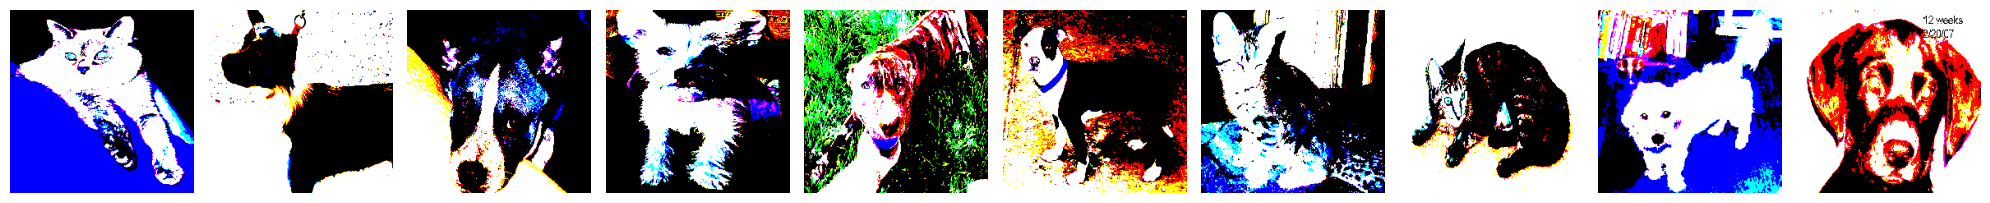

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [7]:
plotImages(imgs)
print(labels)

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation = 'softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(x=train_batches, validation_data=valid_batches, epochs = 10, verbose =2)

Epoch 1/10
100/100 - 25s - loss: 21.0175 - accuracy: 0.5330 - val_loss: 7.6300 - val_accuracy: 0.5500 - 25s/epoch - 253ms/step
Epoch 2/10
100/100 - 25s - loss: 2.6975 - accuracy: 0.7610 - val_loss: 4.1638 - val_accuracy: 0.6000 - 25s/epoch - 247ms/step
Epoch 3/10
100/100 - 27s - loss: 1.1480 - accuracy: 0.8440 - val_loss: 5.2142 - val_accuracy: 0.6050 - 27s/epoch - 273ms/step
Epoch 4/10
100/100 - 42s - loss: 0.6673 - accuracy: 0.8890 - val_loss: 4.8519 - val_accuracy: 0.5700 - 42s/epoch - 416ms/step
Epoch 5/10
100/100 - 41s - loss: 0.1257 - accuracy: 0.9710 - val_loss: 3.4119 - val_accuracy: 0.6200 - 41s/epoch - 415ms/step
Epoch 6/10
100/100 - 35s - loss: 0.0199 - accuracy: 0.9900 - val_loss: 3.3872 - val_accuracy: 0.6050 - 35s/epoch - 350ms/step
Epoch 7/10
100/100 - 35s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.5155 - val_accuracy: 0.5850 - 35s/epoch - 349ms/step
Epoch 8/10
100/100 - 35s - loss: 6.2769e-04 - accuracy: 1.0000 - val_loss: 3.4494 - val_accuracy: 0.5800 - 35s/epoch 

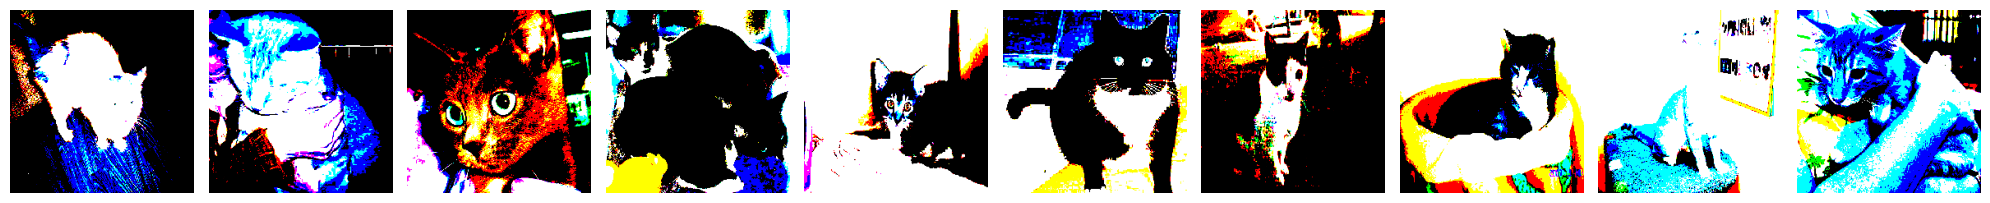

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [15]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
predictions = model.predict(x=test_batches, verbose = 0)

In [17]:
np.round(predictions)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [18]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

In [19]:
def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion Matrix", cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation = "nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [21]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion Matrix, without normalization
[[34 16]
 [20 30]]


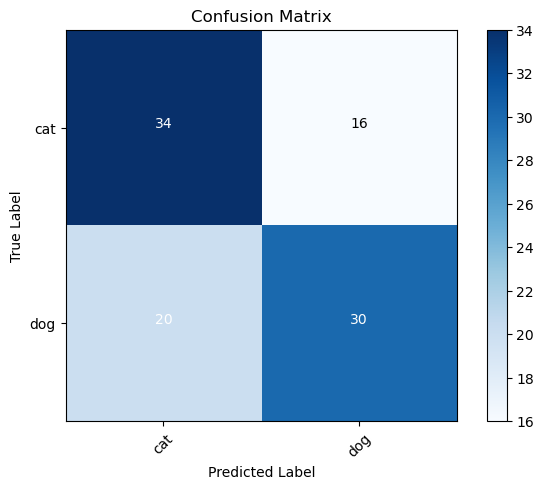

In [22]:
cm_plot_labels = ["cat", "dog"]
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = "Confusion Matrix")

In [23]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 14s 0us/step


In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
type(vgg16_model)

keras.src.engine.functional.Functional

In [26]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [28]:
for layer in model.layers:
    layer.trainable = False

In [29]:
model.add(Dense(units=2, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [31]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
model.fit(x=train_batches, validation_data=valid_batches, epochs = 5, verbose =2)

Epoch 1/5
100/100 - 274s - loss: 0.3830 - accuracy: 0.8270 - val_loss: 0.1492 - val_accuracy: 0.9400 - 274s/epoch - 3s/step
Epoch 2/5
100/100 - 294s - loss: 0.0776 - accuracy: 0.9750 - val_loss: 0.1280 - val_accuracy: 0.9450 - 294s/epoch - 3s/step
Epoch 3/5
100/100 - 302s - loss: 0.0507 - accuracy: 0.9860 - val_loss: 0.1106 - val_accuracy: 0.9500 - 302s/epoch - 3s/step
Epoch 4/5
100/100 - 295s - loss: 0.0372 - accuracy: 0.9900 - val_loss: 0.1187 - val_accuracy: 0.9500 - 295s/epoch - 3s/step
Epoch 5/5
100/100 - 279s - loss: 0.0288 - accuracy: 0.9920 - val_loss: 0.1208 - val_accuracy: 0.9500 - 279s/epoch - 3s/step


In [33]:
predictions = model.predict(x=test_batches, verbose = 0)

In [34]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

In [36]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion Matrix, without normalization
[[50  0]
 [ 5 45]]


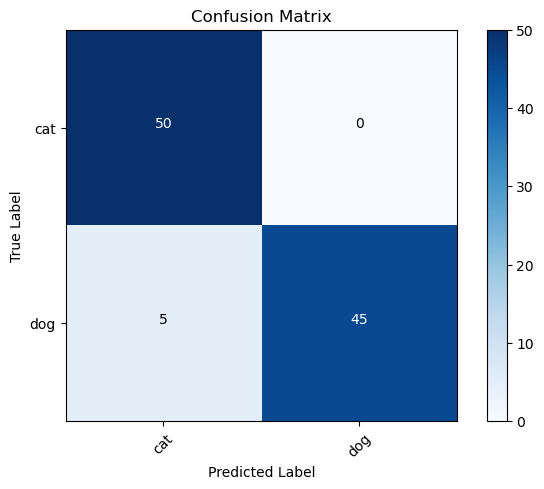

In [37]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = 'Confusion Matrix')